In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
batch_size = 64
epochs = 50
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize between [-1, 1]
])

dataloader = DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True
)

# Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(True,0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(True,0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(True,0.2),
            nn.Linear(512, 784),
            nn.Tanh()
        )

    def forward(self, z):
        x = self.model(z)
        return x.view(-1, 1, 28, 28)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            # Instead of 512 → 256 → 1, use:
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()

        )

    def forward(self, x):
        return self.model(x)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.11MB/s]


In [4]:
# Weight Initialization
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0.0, 0.02)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

Epoch [1/50]  D Loss: 0.9375  G Loss: 1.3548
Epoch [2/50]  D Loss: 1.0197  G Loss: 2.9624
Epoch [3/50]  D Loss: 0.6899  G Loss: 1.4658
Epoch [4/50]  D Loss: 0.8851  G Loss: 0.9364
Epoch [5/50]  D Loss: 0.7224  G Loss: 3.7164
Epoch [6/50]  D Loss: 0.5524  G Loss: 3.3748
Epoch [7/50]  D Loss: 0.6398  G Loss: 2.0172
Epoch [8/50]  D Loss: 0.5598  G Loss: 3.1415
Epoch [9/50]  D Loss: 0.5942  G Loss: 2.2981
Epoch [10/50]  D Loss: 0.6158  G Loss: 1.7768


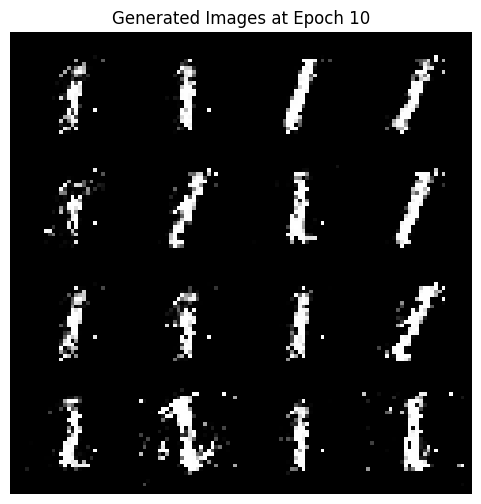

Epoch [11/50]  D Loss: 0.7256  G Loss: 4.0943
Epoch [12/50]  D Loss: 0.5798  G Loss: 2.5592
Epoch [13/50]  D Loss: 0.6991  G Loss: 3.8353
Epoch [14/50]  D Loss: 0.6329  G Loss: 4.0650
Epoch [15/50]  D Loss: 0.5954  G Loss: 2.9781
Epoch [16/50]  D Loss: 0.5782  G Loss: 4.9391
Epoch [17/50]  D Loss: 0.7761  G Loss: 1.3896
Epoch [18/50]  D Loss: 0.5122  G Loss: 2.5597
Epoch [19/50]  D Loss: 0.6042  G Loss: 2.3333
Epoch [20/50]  D Loss: 0.5689  G Loss: 2.2962


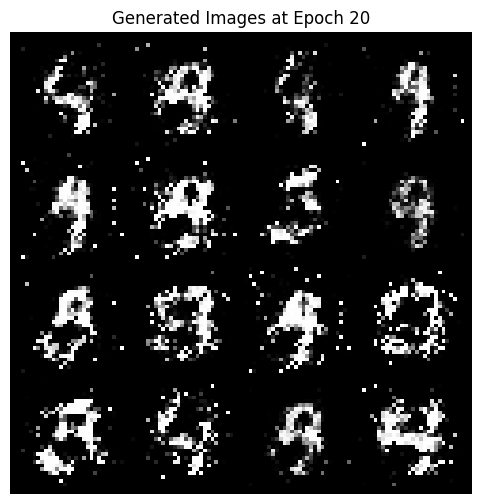

Epoch [21/50]  D Loss: 0.4866  G Loss: 3.7400
Epoch [22/50]  D Loss: 0.4421  G Loss: 4.0375
Epoch [23/50]  D Loss: 0.5872  G Loss: 5.6464
Epoch [24/50]  D Loss: 0.4498  G Loss: 3.9793
Epoch [25/50]  D Loss: 0.7996  G Loss: 6.6681
Epoch [26/50]  D Loss: 0.7360  G Loss: 1.3606
Epoch [27/50]  D Loss: 0.4005  G Loss: 4.6037
Epoch [28/50]  D Loss: 0.5204  G Loss: 2.2705
Epoch [29/50]  D Loss: 0.4646  G Loss: 3.5374
Epoch [30/50]  D Loss: 0.6597  G Loss: 2.5801


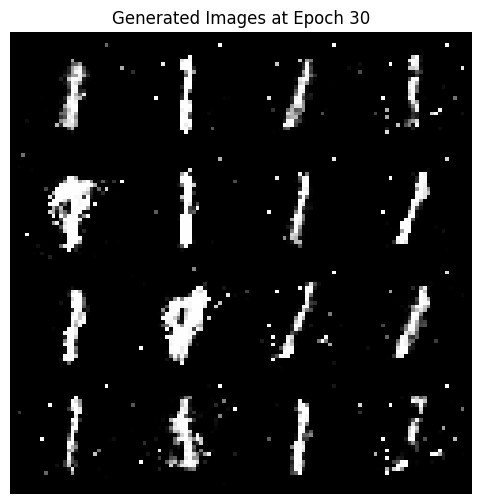

Epoch [31/50]  D Loss: 0.5749  G Loss: 1.8497
Epoch [32/50]  D Loss: 0.4930  G Loss: 3.8715
Epoch [33/50]  D Loss: 0.4056  G Loss: 5.1064
Epoch [34/50]  D Loss: 0.5550  G Loss: 2.9457
Epoch [35/50]  D Loss: 0.5423  G Loss: 3.3866
Epoch [36/50]  D Loss: 0.4118  G Loss: 3.9404
Epoch [37/50]  D Loss: 0.6359  G Loss: 2.9568
Epoch [38/50]  D Loss: 0.4802  G Loss: 2.7008
Epoch [39/50]  D Loss: 0.5080  G Loss: 3.4758
Epoch [40/50]  D Loss: 0.6382  G Loss: 2.2302


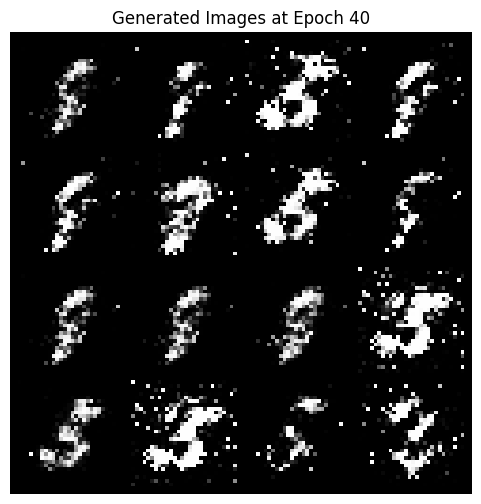

Epoch [41/50]  D Loss: 0.5865  G Loss: 3.0006
Epoch [42/50]  D Loss: 0.3879  G Loss: 5.5973
Epoch [43/50]  D Loss: 0.4967  G Loss: 3.9864
Epoch [44/50]  D Loss: 0.4690  G Loss: 4.6755
Epoch [45/50]  D Loss: 0.4451  G Loss: 4.2203
Epoch [46/50]  D Loss: 0.4748  G Loss: 3.0770
Epoch [47/50]  D Loss: 0.5439  G Loss: 2.8269
Epoch [48/50]  D Loss: 0.6389  G Loss: 2.0114
Epoch [49/50]  D Loss: 0.4308  G Loss: 4.4658
Epoch [50/50]  D Loss: 0.6073  G Loss: 2.6140


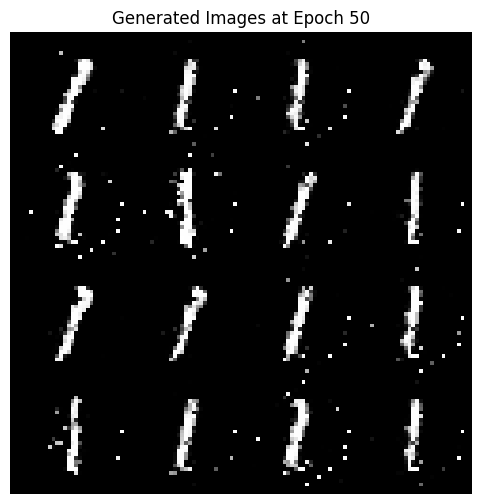

In [5]:

G = Generator().to(device)
D = Discriminator().to(device)
G.apply(weights_init)
D.apply(weights_init)

# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
for epoch in range(epochs):
    for i, (images, _) in enumerate(dataloader):
        batch_size = images.size(0)
        images = images.to(device)

        real_labels = torch.full((batch_size, 1), 0.9).to(device)  # Smooth real labels
        fake_labels = torch.zeros(batch_size, 1).to(device)


        # ======== Train Discriminator ========
        optimizer_D.zero_grad()
        real_outputs = D(images)
        d_loss_real = criterion(real_outputs, real_labels)

        z = torch.randn(batch_size, latent_dim).to(device)
        fake_images = G(z).detach()
        fake_outputs = D(fake_images)
        d_loss_fake = criterion(fake_outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # ======== Train Generator ========
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        generated_images = G(z)
        outputs = D(generated_images)
        g_loss = criterion(outputs, real_labels)  # Generator wants D to output 1
        g_loss.backward()
        optimizer_G.step()

    # Print loss once per epoch
    print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # Visualize samples every 10 epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            samples = G(z).cpu()
            grid = utils.make_grid(samples, nrow=4, normalize=True)
            plt.figure(figsize=(6,6))
            plt.imshow(grid.permute(1, 2, 0).numpy())
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis('off')
            plt.show()

# LSTM implementation

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
torch.manual_seed(0)

t=np.linspace(0,100,1000)
data= np.sin(t)

def create_sequences(data, seq_length):
  xs=[]
  ys=[]
  for i in range(len(data)-seq_length-1):
    x=data[i:(i+seq_length)]
    y=data[i+seq_length]
    xs.append(x)
    ys.append(y)
  return np.array(xs), np.array(ys)

seq_length=10
X, y = create_sequences(data, seq_length)

trainX= torch.tensor(X[:,:,None], dtype = torch.float32)
trainY = torch.tensor(y[:,None], dtype= torch.float32)




In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None, c0=None):
        if h0 is None or c0 is None:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)

        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out, hn, cn

In [ ]:
model = LSTMModel(input_dim=1, hidden_dim=100, layer_dim=1, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 100
h0, c0 = None, None

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    outputs, h0, c0 = model(trainX, h0, c0)

    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()

    h0 = h0.detach()
    c0 = c0.detach()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2157
Epoch [20/100], Loss: 0.1046
Epoch [30/100], Loss: 0.0379
Epoch [40/100], Loss: 0.0074
Epoch [50/100], Loss: 0.0017
Epoch [60/100], Loss: 0.0004
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0000


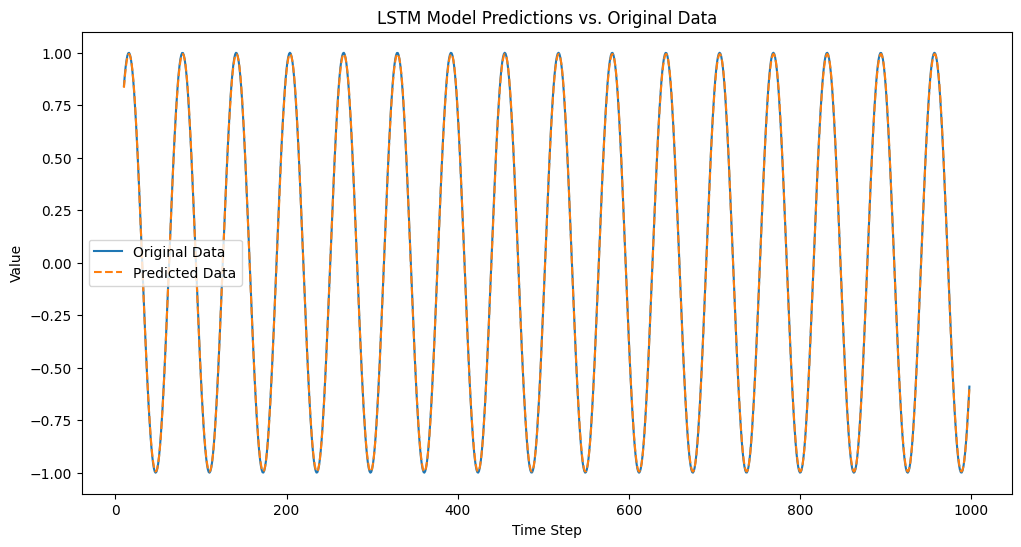

In [ ]:
model.eval()
predicted, _, _ = model(trainX, h0, c0)

original = data[seq_length:seq_length + len(predicted)]
time_steps = np.arange(seq_length, seq_length + len(predicted))

plt.figure(figsize=(12, 6))
plt.plot(time_steps, original, label='Original Data')
plt.plot(time_steps, predicted.detach().numpy(), label='Predicted Data', linestyle='--')
plt.title('LSTM Model Predictions vs. Original Data')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()